In [1]:
# https://github.com/siglimumuni/Machine_Learning_with_Python/blob/main/Decision%20Trees%20and%20Random%20Forests.ipynb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loans = pd.read_csv("https://raw.githubusercontent.com/goldenfingaz/Datasets/master/loan_data.csv")

In [3]:
loans.info()
loans.head()
loans.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [4]:
loans['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

Text(0.5, 0, 'FICO score')

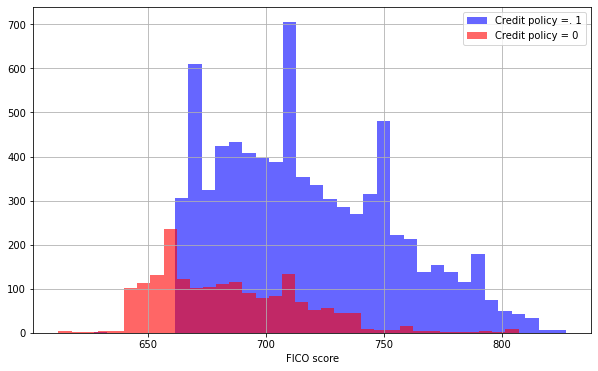

In [5]:
plt.figure(figsize=[10,6])
loans[loans["credit.policy"] == 1]["fico"].hist(bins=35,color = "blue", label="Credit policy =. 1",alpha=0.6)
loans[loans["credit.policy"] == 0]["fico"].hist(bins=35,color = 'red', label = "Credit policy = 0",alpha = 0.6)
plt.legend()
plt.xlabel("FICO score")

Text(0.5, 0, 'FICO score')

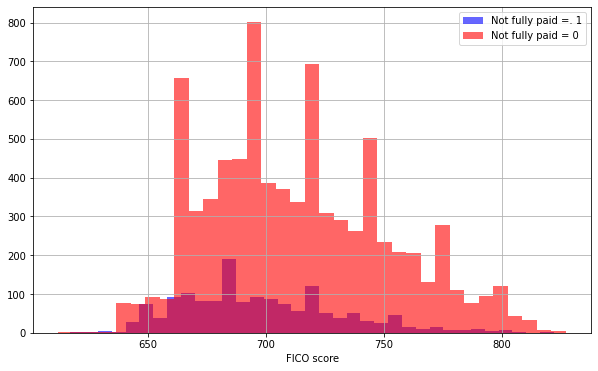

In [6]:
plt.figure(figsize=[10,6])
loans[loans["not.fully.paid"] == 1]["fico"].hist(bins=35,color = "blue", label="Not fully paid =. 1",alpha=0.6)
loans[loans["not.fully.paid"] == 0]["fico"].hist(bins=35,color = 'red', label = "Not fully paid = 0",alpha = 0.6)
plt.legend()
plt.xlabel("FICO score")

Text(0.5, 0, 'Purpose')

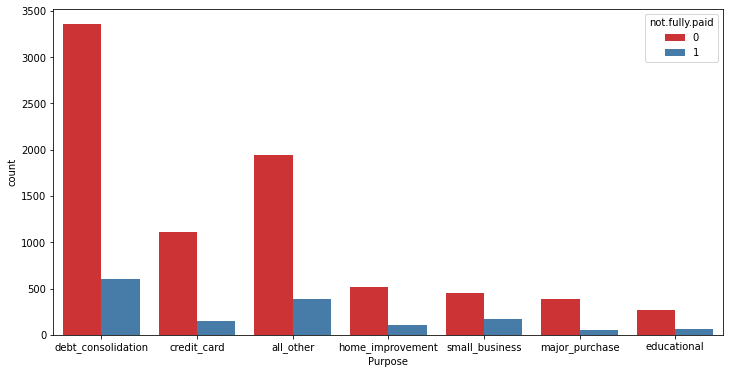

In [7]:
plt.figure(figsize=[12,6])
sns.countplot(data = loans, x='purpose',hue = "not.fully.paid",palette='Set1')
plt.xlabel("Purpose")

In [8]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [9]:
cat_feats = ['purpose']

In [10]:
final_data = pd.get_dummies(loans, columns=cat_feats,drop_first=True)

In [15]:
from sklearn.model_selection import train_test_split

X = final_data.drop("not.fully.paid",axis=1)
y = final_data["not.fully.paid"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

In [16]:
# Training a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [22]:
# Predictions and Evaluation of Decision Tree
predictions = dtree.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[1976  455]
 [ 337  106]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      2431
           1       0.19      0.24      0.21       443

    accuracy                           0.72      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.72      0.74      2874



In [24]:
# Training the Random Forest model
from sklearn.ensemble import RandomForestClassifier

randF = RandomForestClassifier(n_estimators=200)
randF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [25]:
# Predictions and Evaluation
randF_predictions = randF.predict(X_test)

print(confusion_matrix(y_test, randF_predictions))
print(classification_report(y_test, randF_predictions))

[[2421   10]
 [ 434    9]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.47      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.66      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874

